In [70]:
# Imports
import torch

import snntorch as snn

In [71]:
# Implementation

In [72]:
# Define LIF neuron

# U[t+1] = beta * U[t] + W * X[t+1] - S[t] * threshold
def lif(membrane_potential, inputs, weights, threshold=1, beta=0.9):
    spk = (membrane_potential > threshold)
    term_1 = beta * membrane_potential
    term_2 = inputs * weights
    term_3 = spk * threshold
    membrane_potential = term_1 + term_2 - term_3
    return spk, membrane_potential

In [84]:
leaky = snn.Leaky(beta=0.82)

In [85]:
# Test

In [92]:
total_step = 100
mem = torch.zeros(1)
inputs = torch.randint(0, 2, (100,))
#inputs = torch.zeros(100)
#inputs[49] = 1
weights = 0.5
spk_rec = []
mem_rec = []

In [93]:
for step in range(total_step):
    #spk, mem = lif(mem, inputs[step], weights)
    spk, mem = leaky(inputs[step] * weights, mem)
    spk_rec.append(spk)
    mem_rec.append(mem)

In [94]:
spk_rec = torch.stack(spk_rec)
mem_rec = torch.stack(mem_rec)

In [95]:
# Visualization

In [96]:
import matplotlib.pyplot as plt

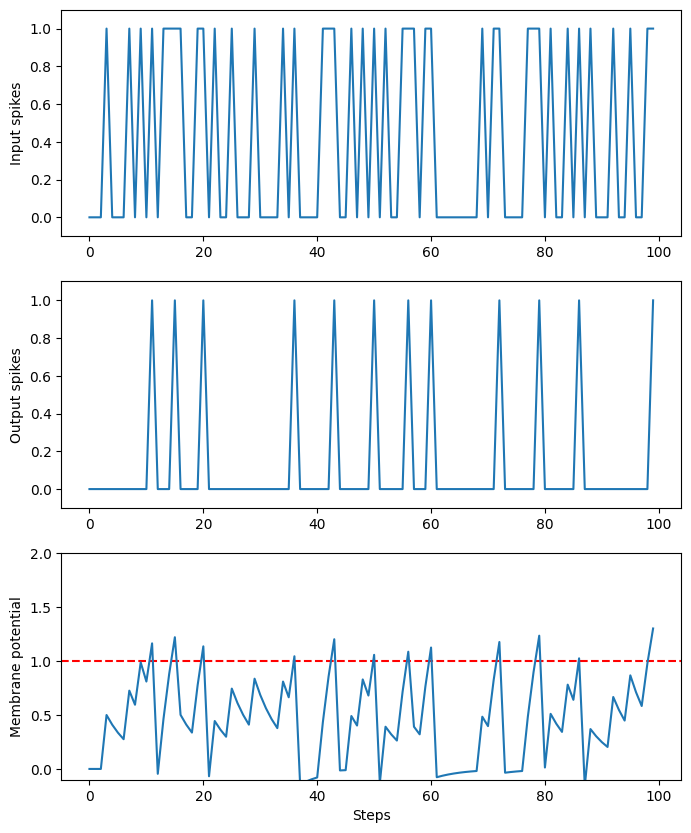

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

# Input spike train
axes[0].set_ylabel("Input spikes")
axes[0].set_ylim([-0.1, 1.1])
axes[0].plot(inputs)

# Output spike train
axes[1].set_ylabel("Output spikes")
axes[1].set_ylim([-0.1, 1.1])
axes[1].plot(spk_rec)


# Membrane potential dynamics
axes[2].set_xlabel("Steps")
axes[2].set_ylabel("Membrane potential")
axes[2].set_ylim([-0.1, 2])
axes[2].axhline(y=1.0, color='r', linestyle='--', label='Threshold')
axes[2].plot(mem_rec)

plt.show()